In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
import src.data as dt
import src.feature_engineering as fe

First 5 rows:
                        open     high      low    close  spread
time                                                           
2020-01-02 01:00:00  2165.82  2169.32  2162.89  2163.11      20
2020-01-02 02:00:00  2163.13  2166.00  2162.70  2164.96      20
2020-01-02 03:00:00  2164.94  2167.28  2162.74  2165.66      20
2020-01-02 04:00:00  2165.66  2167.58  2163.86  2167.39      22
2020-01-02 05:00:00  2167.39  2169.93  2166.75  2169.91      20 

------------------------------------------------------------------------------------------------------------------------
Last 5 rows:
                        open     high      low    close  spread
time                                                           
2025-09-05 16:00:00  5447.51  5456.26  5433.22  5455.01     102
2025-09-05 17:00:00  5454.84  5474.80  5451.73  5474.64     107
2025-09-05 18:00:00  5474.54  5477.82  5459.37  5468.49      92
2025-09-05 19:00:00  5468.33  5483.78  5466.57  5476.84      98
2025-09-05 20:00:0

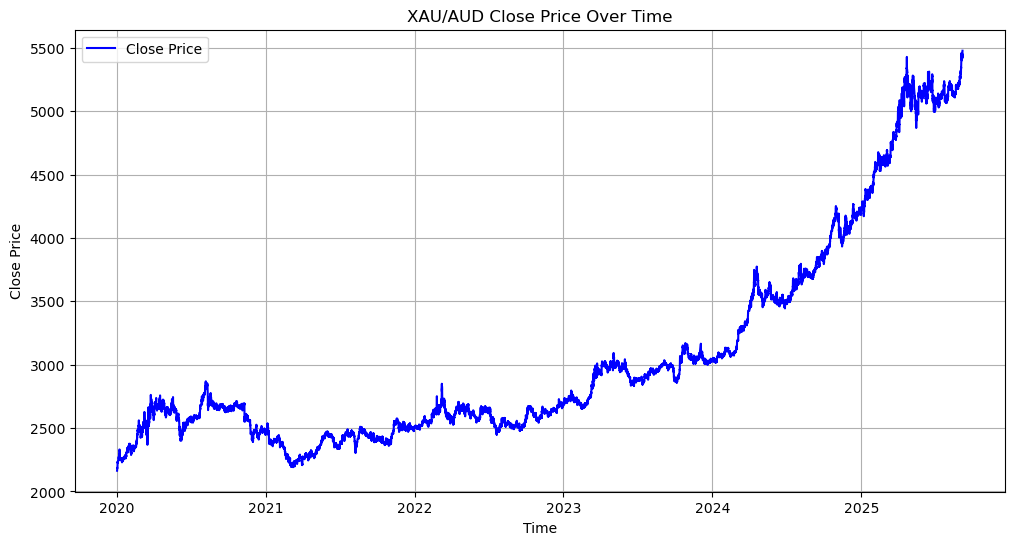

In [2]:
df = dt.get_data(file_path='../data/xauaud.csv', symbole='XAU/AUD')

First 5 rows:
                        open     high      low    close  spread  \
time                                                              
2020-01-02 02:00:00  2163.13  2166.00  2162.70  2164.96      20   
2020-01-02 03:00:00  2164.94  2167.28  2162.74  2165.66      20   
2020-01-02 04:00:00  2165.66  2167.58  2163.86  2167.39      22   
2020-01-02 05:00:00  2167.39  2169.93  2166.75  2169.91      20   
2020-01-02 06:00:00  2169.91  2170.50  2168.75  2169.84      20   

                     open_pct_change  high_pct_change  low_pct_change  \
time                                                                    
2020-01-02 02:00:00        -0.001242        -0.001530       -0.000088   
2020-01-02 03:00:00         0.000837         0.000591        0.000018   
2020-01-02 04:00:00         0.000333         0.000138        0.000518   
2020-01-02 05:00:00         0.000799         0.001084        0.001336   
2020-01-02 06:00:00         0.001163         0.000263        0.000923   

    

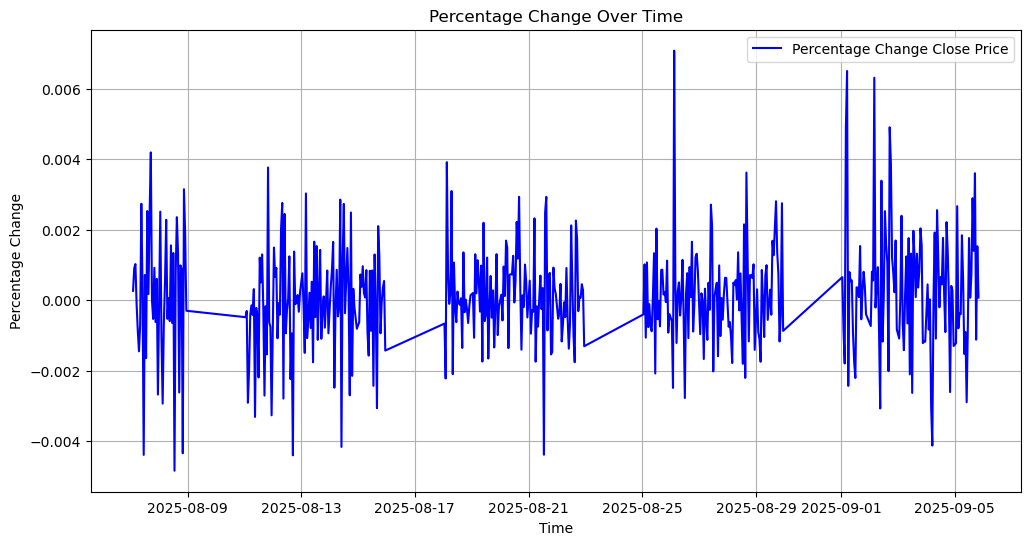

In [3]:
ohlc_pct_change_df = dt.pct_change(df)
ohlc_pct_change_df.to_csv('../data/ohlc_pct_change.csv')

First 5 rows:
                        open     high      low    close  spread  \
time                                                              
2020-01-02 01:00:00  2165.82  2169.32  2162.89  2163.11      20   
2020-01-02 02:00:00  2163.13  2166.00  2162.70  2164.96      20   
2020-01-02 03:00:00  2164.94  2167.28  2162.74  2165.66      20   
2020-01-02 04:00:00  2165.66  2167.58  2163.86  2167.39      22   
2020-01-02 05:00:00  2167.39  2169.93  2166.75  2169.91      20   

                     open_pct_change  high_pct_change  low_pct_change  \
time                                                                    
2020-01-02 01:00:00              NaN              NaN             NaN   
2020-01-02 02:00:00        -0.001242        -0.001530       -0.000088   
2020-01-02 03:00:00         0.000837         0.000591        0.000018   
2020-01-02 04:00:00         0.000333         0.000138        0.000518   
2020-01-02 05:00:00         0.000799         0.001084        0.001336   

    

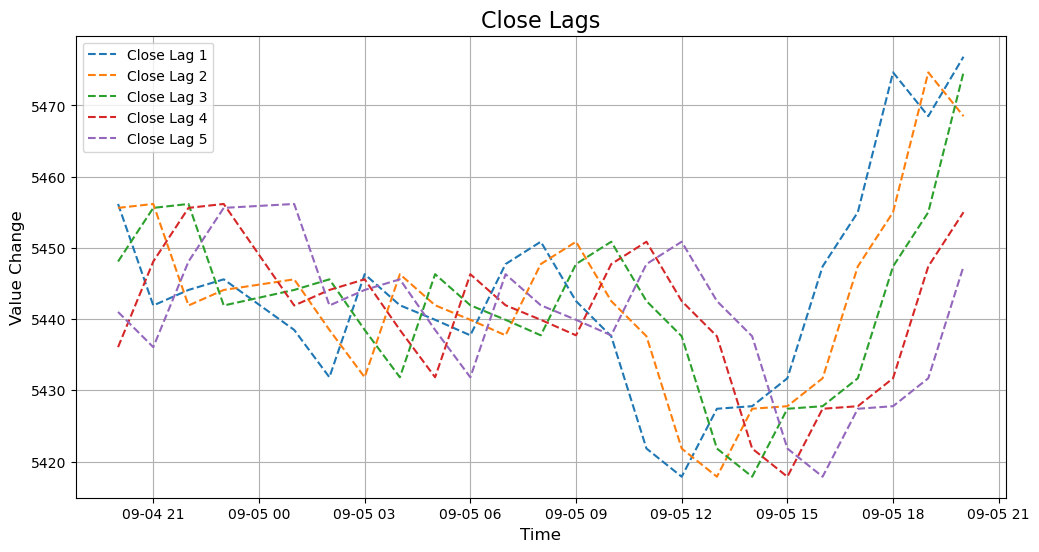

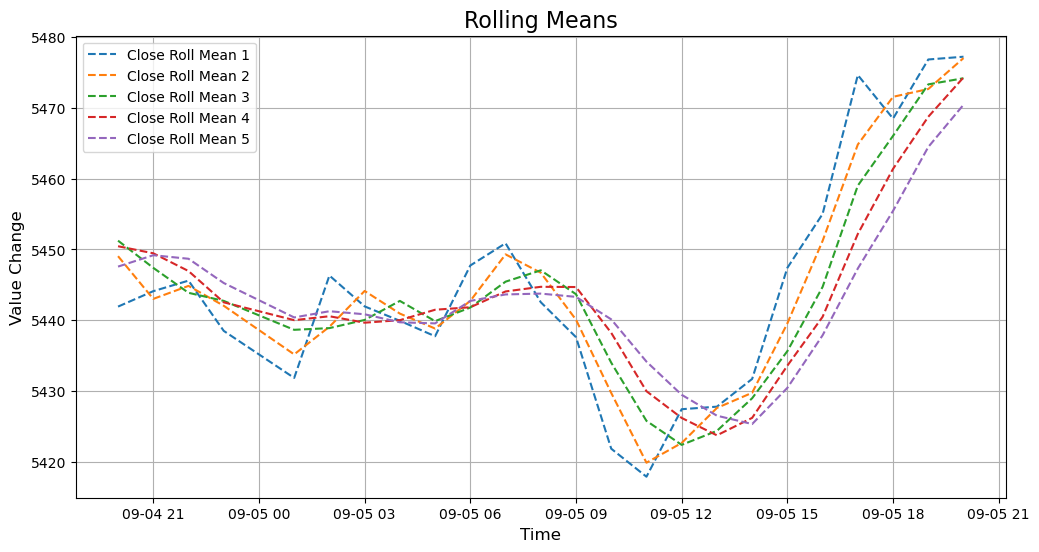

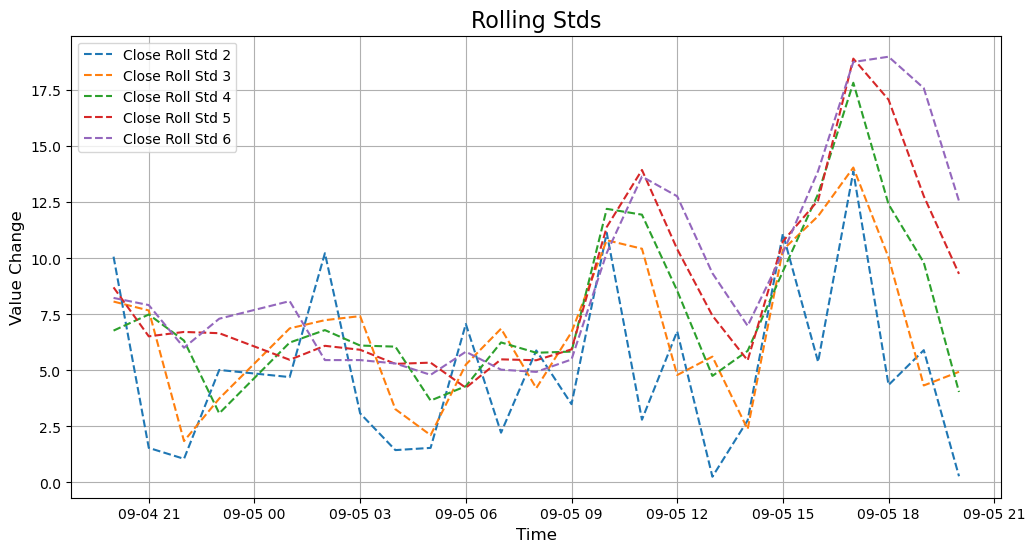

In [4]:
df_with_features = fe.lags_and_rolls(df, num_lags=5, num_rolls=5)

/Users/foivosampatzis/Documents/Project's/Forex_Prediction-/src/data.py:75: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[new_col_name] = df[col].pct_change()
/opt/anaconda3/envs/dpenv/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/anaconda3/envs/dpenv/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/anaconda3/envs/dpenv/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/opt/anaconda3/envs/dpenv/lib/python3.10/site

First 5 rows:
                        open     high      low    close  spread  \
time                                                              
2020-01-02 07:00:00  2169.84  2172.76  2168.87  2171.22      23   
2020-01-02 08:00:00  2171.22  2173.36  2170.91  2172.78      18   
2020-01-02 09:00:00  2172.74  2173.01  2169.65  2169.99       8   
2020-01-02 10:00:00  2170.08  2172.69  2168.47  2170.86       8   
2020-01-02 21:00:00  2185.93  2187.50  2184.81  2186.64       9   

                     open_pct_change  high_pct_change  low_pct_change  \
time                                                                    
2020-01-02 07:00:00        -0.000032         0.001041        0.000055   
2020-01-02 08:00:00         0.000636         0.000276        0.000941   
2020-01-02 09:00:00         0.000700        -0.000161       -0.000580   
2020-01-02 10:00:00        -0.001224        -0.000147       -0.000544   
2020-01-02 21:00:00         0.000897         0.000549        0.000435   

    

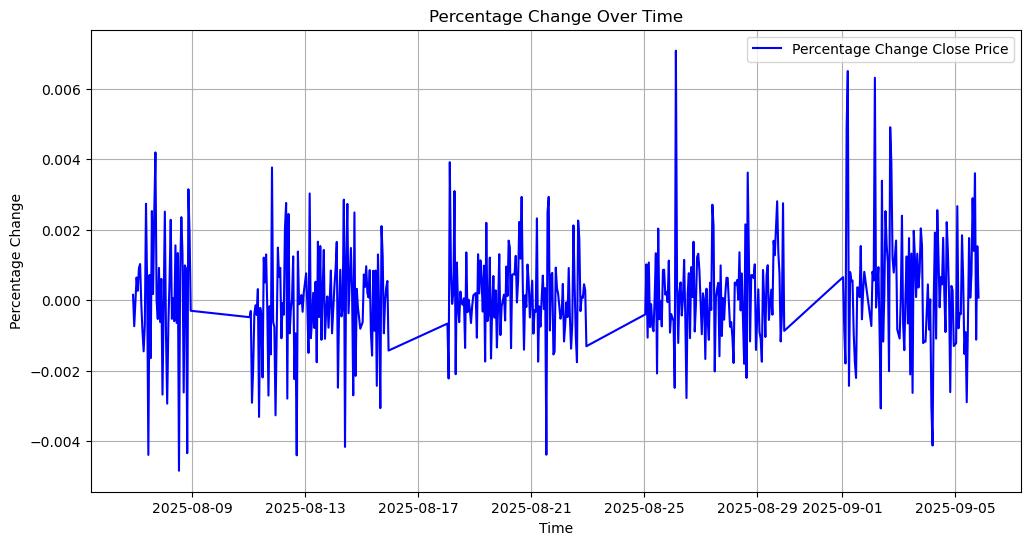

In [5]:
df_with_features_pct_change = dt.pct_change(df_with_features)